In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
# 1. 데이터 불러오기
iris_dataset = datasets.load_iris()

# 2. 데이터 분할
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=5)

# 3. modeling
multi_logreg = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

# 4. 결과 비교
print('train set accuracy {:.3f}'.format(multi_logreg.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(multi_logreg.score(X_test, y_test)))

# 5. parameter tuning
logreg0p01 = LogisticRegression(multi_class='ovr', C=0.01).fit(X_train, y_train)
logreg100 = LogisticRegression(multi_class='ovr', C=100).fit(X_train, y_train)

train set accuracy 0.933
test set accuracy 0.978


---

### 2.2 Linear Support Vector
- parameter C를 조정해 과대적합 혹은 과소적합 문제를 해결
- C(cost func.) 값이 크면(높은 코스트) 훈련을 더 복잡하게 → 약한 규제
- C 값이 작으면 훈련을 덜 복잡하게 → 강한 규제

In [10]:
from sklearn.svm import LinearSVC  # 서포트벡터 분류법

In [14]:
# 1. toy dataset 생성
X, y = datasets.make_blobs(random_state=42)
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

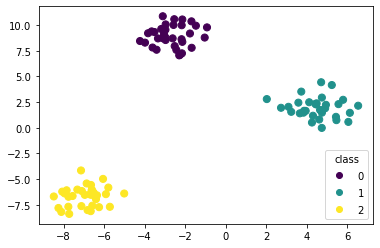

In [16]:
# 2. graph
fig,ax = plt.subplots()

scatter = ax.scatter(X[:,0], X[:,1], c=y, s=50)
ax.legend(*scatter.legend_elements(), loc='lower right', title='class')

In [18]:
# 3. modeling
linear_svm = LinearSVC().fit(X,y)

In [22]:
# 4.1 클래스별 계수 확인
linear_svm.coef_

array([[-0.17492357,  0.23140129],
       [ 0.47621202, -0.06936685],
       [-0.18913851, -0.20400569]])

In [23]:
linear_svm.intercept_

array([-1.07745581,  0.13140388, -0.08604932])

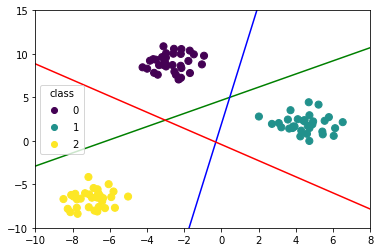

In [28]:
# Graph
line = np.linspace(-15,15)

fig,ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y, s=50)

for coef,intercept,color in zip(linear_svm.coef_, linear_svm.intercept_, ['green','blue','red']):
    ax.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

ax.set_xlim(-10,8)
ax.set_ylim(-10,15)

ax.legend(*scatter.legend_elements(), loc='best', title='class')
plt.show()

### mlxtend package

In [31]:
from mlxtend.plotting import plot_decision_regions

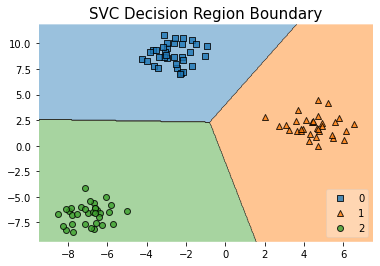

In [33]:
plot_decision_regions(X=X, y=y, 
                      clf=linear_svm, legend=4)
plt.title('SVC Decision Region Boundary', size=15)
plt.show()

---

#### with Iris Dataset

In [36]:
iris = datasets.load_iris()

X = iris.data[:,2:4]
y = iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=35)

In [37]:
iris_svm = LinearSVC().fit(X_train, y_train)

In [41]:
iris_svm.predict(X_test)

array([1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1,
       2])

In [40]:
print('train set accuracy {:.3f}'.format(iris_svm.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(iris_svm.score(X_test, y_test)))

train accuracy 0.952
test accuracy 0.889


In [83]:
iris_svm100 = LinearSVC(C=100, max_iter=100000, dual=False).fit(X_train, y_train)
print('train set accuracy {:.3f}'.format(iris_svm100.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(iris_svm100.score(X_test, y_test)))

train set accuracy 0.981
test set accuracy 0.933


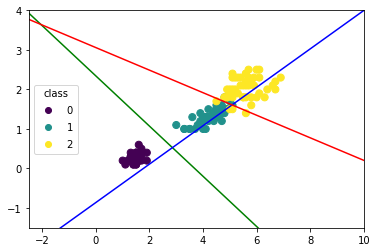

In [89]:
line = np.linspace(-15,15)

fig,ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y, s=50)

for coef,intercept,color in zip(iris_svm100.coef_, iris_svm100.intercept_, ['green','blue','red']):
    ax.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

ax.set_xlim(-2.5,10)
ax.set_ylim(-1.5,4)

ax.legend(*scatter.legend_elements(), loc='best', title='class')
plt.show()

### 커널 기법
- 비선형 특성을 추가하여 선형 모델을 사용하는 경우, 특성이 많을 때 연산비용이 증가할 뿐 아니라 데이터가 부정확해질 위험이 있음
- 수학적 기법을 이용하여 새로운 특성을 임의로 만들지 않고 고차원에서 학습할 수 있음 → 커널 기법

#### 주요 parameter
- gamma: 가우시안 커널의 반경을 결정 \
  감마 값이 크면 커널의 반경이 좁아짐 \
  → 훈련에 각각의 데이터 포인트를 더욱 반영함 → 복잡도 증가 \
  감마 값이 작으면 커널의 반경이 넓어짐 \
  → 훈련에 더 넓은 면적에 걸친 데이터 포인트를 반영 → 복잡도 감소
- C: cost func.

In [90]:
from sklearn.svm import SVC

In [91]:
# 1. load and split data

cancer = datasets.load_breast_cancer()

X=cancer.data
y=cancer.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.2, random_state=0)

In [92]:
# 2. modeling

svc = SVC(gamma=1).fit(X_train, y_train)

In [93]:
# 3. 결과 비교

print('train set accuracy {:.3f}'.format(svc.score(X_train, y_train)))
print('test set accuracy {:.3f}'.format(svc.score(X_test, y_test)))

train set accuracy 1.000
test set accuracy 0.588


In [98]:
for i_cost in [0.01,0.1,1,10,100]:
    for i_gamma in [0.01,0.1,1,10,100]:
        svc = SVC(C=i_cost ,gamma=i_gamma).fit(X_train, y_train)
        print('C={}, gamma={}'.format(i_cost,i_gamma))
        print('train set accuracy {:.3f}'.format(svc.score(X_train, y_train)))
        print('test set accuracy {:.3f}'.format(svc.score(X_test, y_test)),end="\n\n")

C=0.01, gamma=0.01
train set accuracy 0.637
test set accuracy 0.588

C=0.01, gamma=0.1
train set accuracy 0.637
test set accuracy 0.588

C=0.01, gamma=1
train set accuracy 0.637
test set accuracy 0.588

C=0.01, gamma=10
train set accuracy 0.637
test set accuracy 0.588

C=0.01, gamma=100
train set accuracy 0.637
test set accuracy 0.588

C=0.1, gamma=0.01
train set accuracy 0.637
test set accuracy 0.588

C=0.1, gamma=0.1
train set accuracy 0.637
test set accuracy 0.588

C=0.1, gamma=1
train set accuracy 0.637
test set accuracy 0.588

C=0.1, gamma=10
train set accuracy 0.637
test set accuracy 0.588

C=0.1, gamma=100
train set accuracy 0.637
test set accuracy 0.588

C=1, gamma=0.01
train set accuracy 1.000
test set accuracy 0.596

C=1, gamma=0.1
train set accuracy 1.000
test set accuracy 0.588

C=1, gamma=1
train set accuracy 1.000
test set accuracy 0.588

C=1, gamma=10
train set accuracy 1.000
test set accuracy 0.588

C=1, gamma=100
train set accuracy 1.000
test set accuracy 0.588

C=10, 

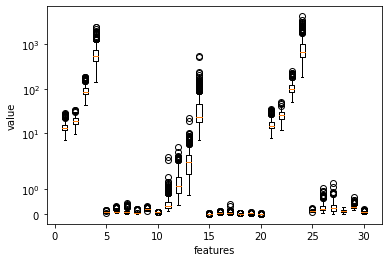

In [96]:
# 1) 변수들의 값의 대략적인 크기 확인
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('features')
plt.ylabel('value')
plt.show()